# Capstone 1 Exploratory Data Analysis

#### Contents
Introduction  <br>
Salary difference of means above/below average 3PAr  <br> 
3PAr difference of means above/below average salary <br>
Salary difference of means above/below average 3P% <br>
3P% difference above/below average salary <br>
Salary difference above/below average USG% <br>
ANOVA test of salary versus position <br>
PER analysis <br>
PER difference of means above/below average age


### Introduction

In the previous portion of the Capstone 1 project, we noticed several interesting trends based on a graphical analysis of our NBA dataset. First, salaries have increased fairly steadily since the 1990s. Second, in the 2000s, as the NBA playstyle has evolved to incorportate a higher number of 3-point shots, certain 3-point-associated statistics have increased including 3-point percentage and 3PAr, which is a ratio of 3-point attempts divided by field goal attempts. Third, usage percentage appears to be higher among older players.  

We'll begin by importing the necessary libraries and reading the relevant dataset. 

In [2]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Allow all columns to be displayed
pd.set_option('display.max_columns', 999)

In [4]:
# Read the relevent dataset 
dfnbaall = pd.read_csv('nba_final_dataset.csv')
dfnbaall.head(10)

,Unnamed: 0,Player,year_start,year_end,Year,Team,Salary,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,career_len
0,0,Alaa Abdelnaby,1991,1995,1991,Portland Trailblazers,395000,PF,22.0,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,3.1,4
1,1,Alaa Abdelnaby,1991,1995,1992,Portland Trailblazers,494000,PF,23.0,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,0.6,1.5,2.1,0.110,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,0.000,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,6.1,4
2,2,Alaa Abdelnaby,1991,1995,1993,Boston Celtics,500000,PF,24.0,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,0.7,1.3,2.0,0.074,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.000,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,7.7,4
3,3,Alaa Abdelnaby,1991,1995,1994,Boston Celtics,805000,PF,25.0,13.0,0.0,159.0,9.2,0.485,0.000,0.455,8.5,24.2,16.3,2.7,0.6,1.2,20.5,22.6,-0.2,0.1,-0.1,-0.032,-7.1,-3.1,-10.2,-0.3,24.0,55.0,0.436,0.0,0.0,0.000,24.0,55.0,0.436,0.436,16.0,25.0,0.640,12.0,34.0,46.0,3.0,2.0,3.0,17.0,20.0,64.0,4.9,4
4,4,Alaa Abdelnaby,1991,1995,1995,Sacramento Kings,650000,PF,26.0,54.0,0.0,506.0,12.6,0.519,0.009,0.152,8.7,17.4,13.1,5.0,1.5,1.8,15.4,25.6,-0.4,0.7,0.3,0.027,-4.6,-1.7,-6.3,-0.6,118.0,231.0,0.511,0.0,2.0,0.000,118.0,229.0,0.515,0.511,20.0,35.0,0.571,37.0,77.0,114.0,13.0,15.0,12.0,45.0,104.0,256.0,4.7,4
5,5,Mahmoud Abdul-Rauf,1991,2001,1991,Denver Nuggets,1660000,PG,21.0,67.0,19.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,14.1,10
6,6,Mahmoud Abdul-Rauf,1991,2001,1992,Denver Nuggets,2008000,PG,22.0,81.0,11.0,1538.0,12.6,0.469,0.111,0.128,1.5,6.8,4.0,21.0,1.4,0.2,11.6,26.7,-0.2,0.8,0.6,0.018,-1.7,-3.5,-5.2,-1.3,356.0,845.0,0.421,31.0,94.0,0.330,325.0,751.0,0.433,0.440,94.0,108.0,0.870,22.0,92.0,114.0,192.0,44.0,4.0,117.0,130.0,837.0,10.3,10
7,7,Mahmoud Abdul-Rauf,1991,2001,1993,Denver Nuggets,2358000,PG,23.0,81.0,81.0,2710.0,15.6,0.515,0.140,0.165,2.0,6.8,4.4,20.8,1.5,0.2,11.0,25.5,3.0,2.2,5.1,0.091,1.1,-2.1,-1.0,0.7,633.0,1407.0,0.450,70.0,197.0,0.355,563.0,1210.0,0.465,0.475,217.0,232.0,0.935,51.0,174.0,225.0,344.0,84.0,8.0,187.0,179.0,1553.0,19.2,10
8,8,Mahmoud Abdul-Rauf,1991,2001,1994,Denver Nuggets,1825000,PG,24.0,80.0,78.0,2617.0,16.7,0.521,0.104,0.179,1.2,5.8,3.6,24.1,1.6,0.2,9.9,24.9,4.4,2.4,6.8,0.125,1.6,-2.1,-0.6,0.9,588.0,1279.0,0.460,42.0,133.0,0.316,546.0,1146.0,0.476,0.476,219.0,229.0,0.956,27.0,141.0,168.0,362.0,82.0,10.0,151.0,150.0,1437.0,18.0,10
9,9,Mahmoud Abdul-Rauf,1991,2001,1995,Denver Nuggets,2200000,PG,25.0,73.0,43.0,2082.0,17.8,0.543,0.214,0.155,1.9,5.9,3.9,23.0,1.9,0.3,10.0,25.8,3.8,1.3,5.0,0.115,2.2,-2.8,-0.6,0.7,472.0,1005.0,0.470,83.0,215.0,0.386,389.0,790.0,0.492,0.511,138.0,156.0,0.885,32.0,105.0,137.0,263.0,77.0,9.0,119.0,126.0,1165.0,16.0,10


In [5]:
# Drop the unnamed column
dfnbaall = dfnbaall.drop(columns=['Unnamed: 0'])

Next, we'll create some functions that we'll be using.

In [6]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2



def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [7]:
# Create a function to determine the difference of means between two arrays
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [8]:
# Define Pearson correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0, 1]

In our data story, we found that two 3-point related statistics have increased fairly steadily over close to the last 15 years - 3PAr and 3P%. In particular the average of these two variables correlated well with average salary. So, we would like to determine if there is a correlation between higher values in these 3-point statistics and higher salaries. For both, we'll perform a two sample bootstrap test two different ways. First, we'll divide groups by 3PAr and 3P%, respectively and compute the mean salary difference between those above and below the average 3PAr and 3P%. Second, we'll divide players by average salary and compute the difference in mean 3PAr and 3P%. For all of these tests, our null hypothesis will be that there is no difference between the two groups of players, regardless of how their divided. Our alternative hypothesis will be that there is a difference. For all of our tests, our significance level will be set at 0.05. 

### Salary difference of means above/below average 3PAr

Null hypothesis: There is no difference in average salary for players above and below the average 3PAr level.

Alternate hypothesis: There is a difference in average salary for players above and below the average 3PAr level.

In [9]:
# There is a very low correlation between 3PAr and salary. Keep in mind that this is not average salary and 
# average 3PAr, which were much more highly correlated.
pearson_r(dfnbaall['Salary'], dfnbaall['3PAr'])

0.001726206884811603

In [10]:
# Salary and 3PAr data of all players above the 3PAr average
abvav3sal = dfnbaall.loc[dfnbaall['3PAr'] > np.mean(dfnbaall['3PAr']),  ['3PAr', 'Salary']]
abvav3sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4375 entries, 9 to 9616
Data columns (total 2 columns):
3PAr      4375 non-null float64
Salary    4375 non-null int64
dtypes: float64(1), int64(1)
memory usage: 102.5 KB


In [11]:
# Salary and 3PAr data of all players below the 3PAr average
belav3sal = dfnbaall.loc[dfnbaall['3PAr'] < np.mean(dfnbaall['3PAr']),  ['3PAr', 'Salary']]
belav3sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5246 entries, 0 to 9620
Data columns (total 2 columns):
3PAr      5246 non-null float64
Salary    5246 non-null int64
dtypes: float64(1), int64(1)
memory usage: 123.0 KB


In [12]:
# Salary data for all players above and below average 3PAr
abvav3salval = abvav3sal['Salary']
belav3salval = belav3sal['Salary']

In [85]:
abvav3sal['Salary'].describe()

count    4.375000e+03
mean     3.735714e+06
std      4.386364e+06
min      5.000000e+03
25%      8.842930e+05
50%      2.050000e+06
75%      4.900000e+06
max      3.096345e+07
Name: Salary, dtype: float64

In [86]:
belav3sal['Salary'].describe()

count    5.246000e+03
mean     3.367662e+06
std      4.081217e+06
min      2.531000e+03
25%      7.286400e+05
50%      1.680000e+06
75%      4.500000e+06
max      2.800000e+07
Name: Salary, dtype: float64

In [13]:
# Difference of means between the salaries
diff_means3sal = diff_of_means(abvav3salval, belav3salval)
diff_means3sal

368052.3836355321

In [14]:
# Two sample bootstrap of 10000 replicates, applying the difference of means function
perm_reps3sal = draw_perm_reps(abvav3salval, belav3salval, diff_of_means, 10000)

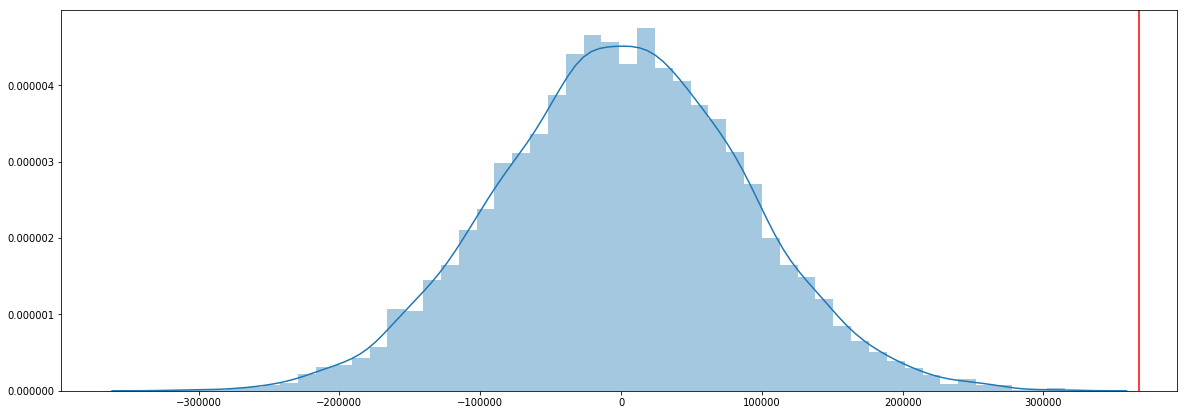

In [132]:
# Plot of the bootstrap distribution, with a line for the difference of means
plt.figure(figsize=(20, 7))
sns.distplot(perm_reps3sal)
plt.axvline(diff_means3sal, color='r')

In [16]:
# Compute p-value: p
p_3salmean = np.sum(perm_reps3sal >= diff_means3sal) / len(perm_reps3sal)
print('The mean salary difference between players who are above and below the average 3PAr is', 
      str(diff_means3sal))
print('The p-value = ', p_3salmean)

The mean salary difference between players who are above and below the average 3PAr is 368052.3836355321
The p-value =  0.0



Our p-value is well below both the 0.05 and 0.01 threshold, so we can reject our null hypothesis and, thus, conclude that there is a significant difference in salary for players above and below the averge 3PAr value. 

### 3PAr difference of means above/below average salary

We can also compute the difference of means in 3PAr between players above and below the average salary to see if we get a similar result for the p-value.

Null hypothesis: There is no difference in average 3PAr for players above and below the average salary.

Alternate hypothesis: There is a difference in average 3PAr for players above and below the average salary.

In [47]:
# Salary and 3PAr values for players above the average salary
abvav3 = dfnbaall.loc[dfnbaall['Salary'] > np.mean(dfnbaall['Salary']),  ['3PAr', 'Salary']]
abvav3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3074 entries, 17 to 9612
Data columns (total 2 columns):
3PAr      3074 non-null float64
Salary    3074 non-null int64
dtypes: float64(1), int64(1)
memory usage: 72.0 KB


In [48]:
# Salary and 3PAr values for players below the average salary
belav3 = dfnbaall.loc[dfnbaall['Salary'] < np.mean(dfnbaall['Salary']),  ['3PAr', 'Salary']]
belav3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6547 entries, 0 to 9620
Data columns (total 2 columns):
3PAr      6547 non-null float64
Salary    6547 non-null int64
dtypes: float64(1), int64(1)
memory usage: 153.4 KB


In [49]:
# 3PAr values
abvav3val = abvav3['3PAr']
belav3val = belav3['3PAr']

In [88]:
abvav3['3PAr'].describe()

count    3074.000000
mean        0.202769
std         0.192556
min         0.000000
25%         0.009000
50%         0.182000
75%         0.348000
max         1.000000
Name: 3PAr, dtype: float64

In [89]:
belav3['3PAr'].describe()

count    6547.000000
mean        0.202022
std         0.202342
min         0.000000
25%         0.009000
50%         0.158000
75%         0.353000
max         1.000000
Name: 3PAr, dtype: float64

In [50]:
# Difference of means between 3PAr values of both groups
diff_means3 = diff_of_means(abvav3val, belav3val)
diff_means3

0.0007470159466508031

In [51]:
# Two sample bootstrap of 10000 replicates, applying the difference of means function
perm_reps3 = draw_perm_reps(abvav3val, belav3val, diff_of_means, 10000)

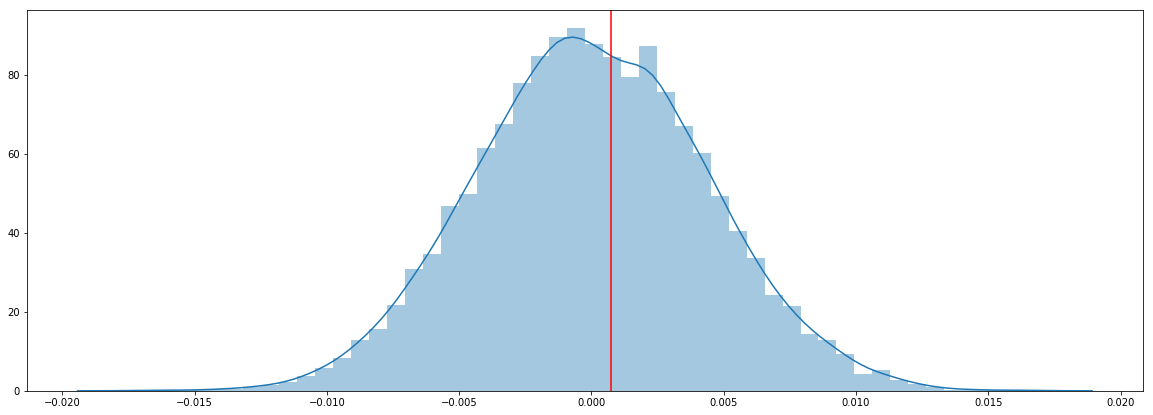

In [133]:
# Plot the distribution
plt.figure(figsize=(20, 7))
sns.distplot(perm_reps3)
plt.axvline(diff_means3, color='r')

In [53]:
# Compute p-value: p
p_3mean = np.sum(perm_reps3 >= diff_means3) / len(perm_reps3)
print('The mean 3PAr difference between players who are above and below the average salary is', 
      str(diff_means3))
print('The p-value = ', p_3mean)

The mean 3PAr difference between players who are above and below the average salary is 0.0007470159466508031
The p-value =  0.4293


The p-value is well above the 0.05 and 0.01 threshold, so we can't reject our null hypothesis and have to accept that there is no significant 3PAr difference between players above and below the average salary level. This is a rather odd result. Typically, the p-value should be similar regardless of which way the data is split. If one result is statistically significant, the other should be as well. So, we'll also run a t-test to confirm that the above results are correct.

In [23]:
from scipy.stats import ttest_ind

In [24]:
# Split groups based on salary
[ttest_ind(dfnbaall.loc[dfnbaall.Salary < np.mean(dfnbaall['Salary']), '3PAr'], 
           dfnbaall.loc[dfnbaall.Salary > np.mean(dfnbaall['Salary']), '3PAr'], equal_var=ev)for ev in (0, 1)]

[Ttest_indResult(statistic=-0.17455095772266385, pvalue=0.8614381032198876),
 Ttest_indResult(statistic=-0.17145706488539247, pvalue=0.8638679943367801)]

In [25]:
# Split groups based on 3PAr
[ttest_ind(dfnbaall.loc[dfnbaall['3PAr'] < np.mean(dfnbaall['3PAr']), 'Salary'], 
           dfnbaall.loc[dfnbaall['3PAr'] > np.mean(dfnbaall['3PAr']), 'Salary'], equal_var=ev)for ev in (0, 1)]

[Ttest_indResult(statistic=-4.229422727587038, pvalue=2.3660066982234623e-05),
 Ttest_indResult(statistic=-4.257077059116683, pvalue=2.0908322087929685e-05)]

Regardless of whether we use a boostrap or frequentist approach, our p-values are drastically different. In one case, the result is statistically significant, and we can reject our null hypothesis, and in the other, we can't.  There doesn't seem to be an apparent explanation as to why we're getting to drastically different results. Let's look at histograms of both methods of dividing the data for further insight.

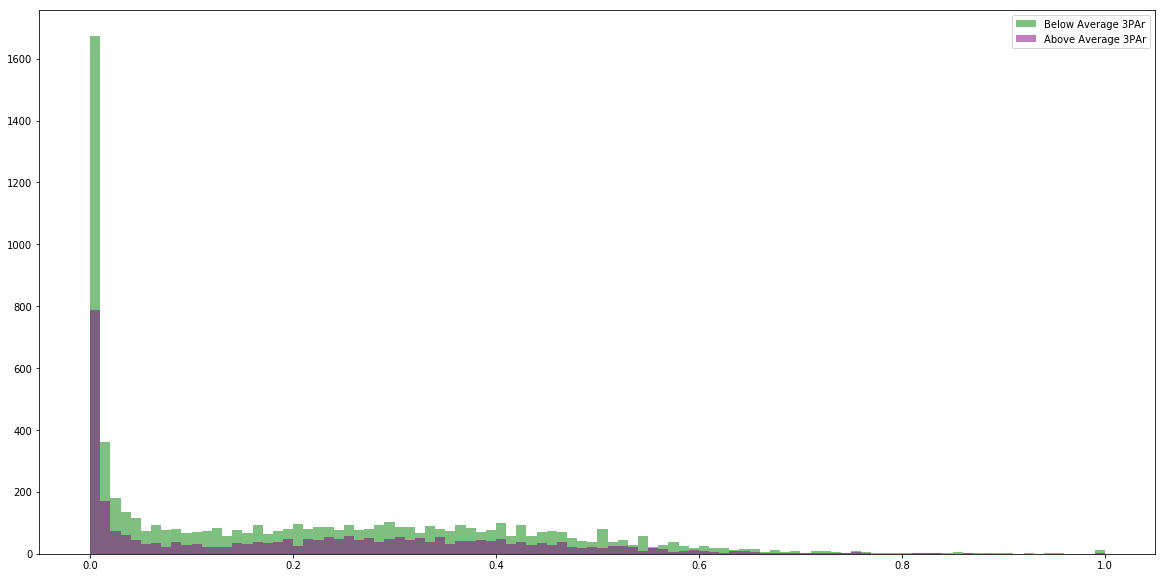

In [107]:
plt.figure(figsize=(20, 10))
_ = plt.hist(dfnbaall.loc[dfnbaall.Salary < np.mean(dfnbaall['Salary']), '3PAr'], bins=100, alpha=.5, color='green', label='Below Average 3PAr')
_ = plt.hist(dfnbaall.loc[dfnbaall.Salary > np.mean(dfnbaall['Salary']), '3PAr'], bins=100, alpha=.5, color='purple', label='Above Average 3PAr')
plt.legend()

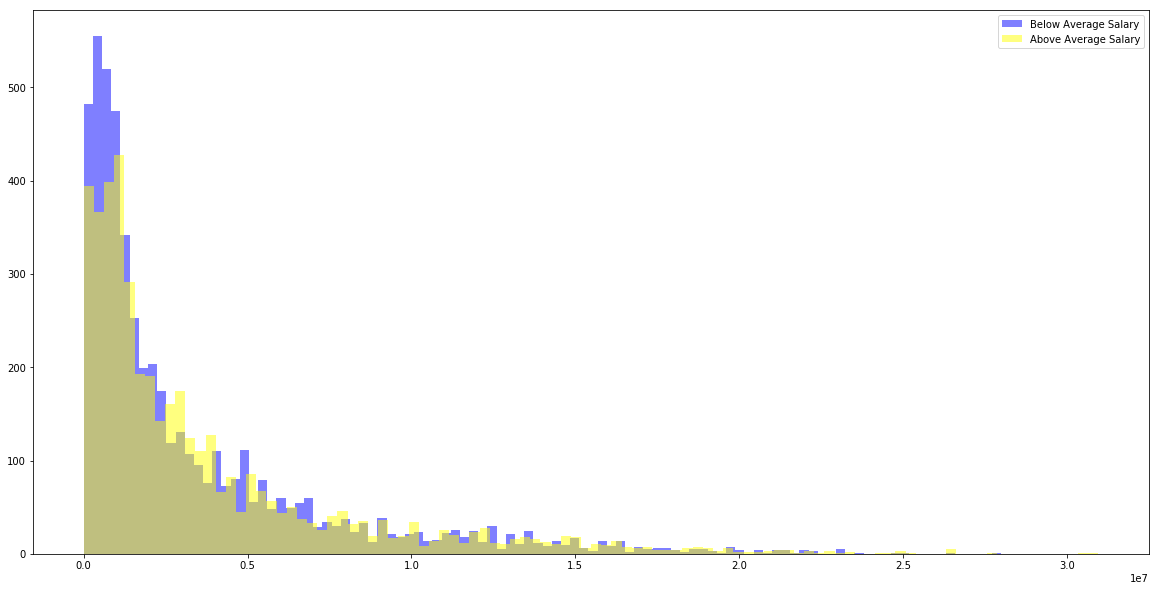

In [108]:
plt.figure(figsize=(20, 10))
_ = plt.hist(dfnbaall.loc[dfnbaall['3PAr'] < np.mean(dfnbaall['3PAr']), 'Salary'], bins=100, alpha=.5, color='blue', label='Below Average Salary')
_ = plt.hist(dfnbaall.loc[dfnbaall['3PAr'] > np.mean(dfnbaall['3PAr']), 'Salary'], bins=100, alpha=.5, color='yellow', label='Above Average Salary')
plt.legend()

In the top graph, the two groups have a very similar shape, despite the separation in numbers. This suggests that it’s less likely that there would be a significant difference in 3PAR means. In the bottom graph, there doesn't appear to be a large difference in salary between groups above and below average 3PAr. However, the shapes of the groups are quite a bit different and that difference is supported by our tests, which indicate that the difference is statistically significant. While these histograms offer a partial explanation, we’re currently at a loss to fully explain why this difference in p-values occurs. Perhaps it has to do with the fact that the difference in means between the 3PAr data is very small. Overall, we can at least conclude that there is a significant difference in salary between players who are above and below average 3PAr.

Given the unusual results for 3PAr, we'll split the data two different ways for 3P% as well. 3PAr and 3P% are connected in the sense that 3-point attempts are a factor in both statistics. They have also both increased similarly over the last 5-10 years of the NBA's history, as evidenced in our data story. 

### Salary difference of means above/below average 3P%

Our null hypothesis is that there is no difference in salary between players above and below average 3P%. The alternative hypothesis is that the difference is statisitcally significant. 

In [54]:
# Salary and 3P% data for all players above the average 3P%
abvav3psal = dfnbaall.loc[dfnbaall['3P%'] > np.mean(dfnbaall['3P%']),  ['3P%', 'Salary']]
abvav3psal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5742 entries, 5 to 9620
Data columns (total 2 columns):
3P%       5742 non-null float64
Salary    5742 non-null int64
dtypes: float64(1), int64(1)
memory usage: 134.6 KB


In [55]:
# Salary and 3P% data for all players below the average 3P%
belav3psal = dfnbaall.loc[dfnbaall['3P%'] < np.mean(dfnbaall['3P%']),  ['3P%', 'Salary']]
belav3psal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3879 entries, 0 to 9619
Data columns (total 2 columns):
3P%       3879 non-null float64
Salary    3879 non-null int64
dtypes: float64(1), int64(1)
memory usage: 90.9 KB


In [91]:
# Salary data for both groups
abvav3psalval = abvav3psal['Salary']
belav3psalval = belav3psal['Salary']

In [90]:
abvav3psal['Salary'].describe()

count    5.742000e+03
mean     4.017336e+06
std      4.528684e+06
min      2.531000e+03
25%      9.676050e+05
50%      2.250000e+06
75%      5.300000e+06
max      3.096345e+07
Name: Salary, dtype: float64

In [92]:
belav3psal['Salary'].describe()

count    3.879000e+03
mean     2.821077e+06
std      3.618872e+06
min      2.853000e+03
25%      5.434710e+05
50%      1.316809e+06
75%      3.750000e+06
max      3.045380e+07
Name: Salary, dtype: float64

In [57]:
# Difference of means in salary
diff_means3psal = diff_of_means(abvav3psalval, belav3psalval)
diff_means3psal

1196259.384489749

In [58]:
# 10000 bootstrap repetiitions 
perm_reps3psal = draw_perm_reps(abvav3psalval, belav3psalval, diff_of_means, 10000)

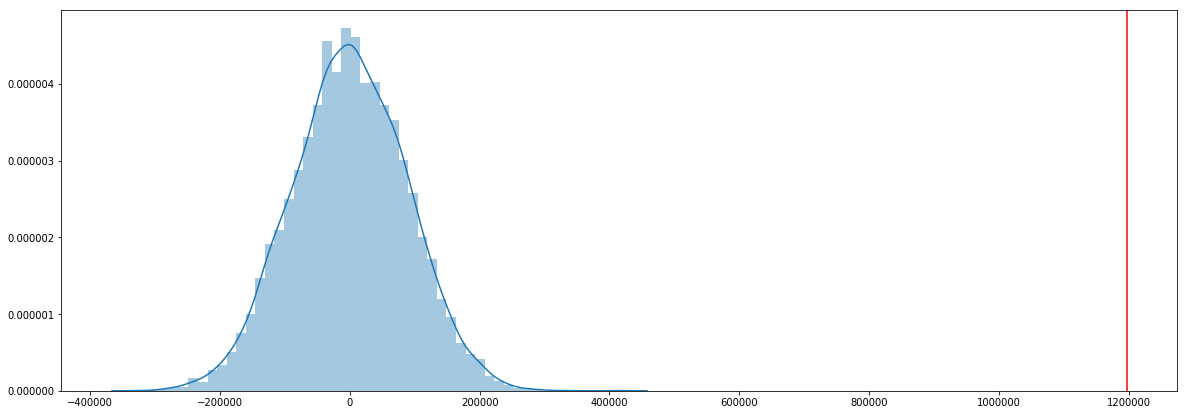

In [134]:
# Distribution of replicates
plt.figure(figsize=(20, 7))
sns.distplot(perm_reps3psal)
plt.axvline(diff_means3psal, color='r')

In [60]:
# Compute p-value: p
p_3psalmean = np.sum(perm_reps3psal >= diff_means3psal) / len(perm_reps3psal)
print('The mean salary difference between players who are above and below the average 3P% is', 
      str(diff_means3psal))
print('The p-value = ', p_3psalmean)

The mean salary difference between players who are above and below the average 3P% is 1196259.384489749
The p-value =  0.0


### 3P% difference of means above/below average salary

Again, our null hypothesis is that there is no difference in 3P% for players above and below the average salary. Our alternative hypothesis is that there is a significant difference between the two groups.

In [61]:
# Salary and 3P% data for players above the average salary
abvav3p = dfnbaall.loc[dfnbaall['Salary'] > np.mean(dfnbaall['Salary']),  ['3P%', 'Salary']]
abvav3p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3074 entries, 17 to 9612
Data columns (total 2 columns):
3P%       3074 non-null float64
Salary    3074 non-null int64
dtypes: float64(1), int64(1)
memory usage: 72.0 KB


In [62]:
# Salary and 3P% data for players below the average salary
belav3p = dfnbaall.loc[dfnbaall['Salary'] < np.mean(dfnbaall['Salary']),  ['3P%', 'Salary']]
belav3p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6547 entries, 0 to 9620
Data columns (total 2 columns):
3P%       6547 non-null float64
Salary    6547 non-null int64
dtypes: float64(1), int64(1)
memory usage: 153.4 KB


In [63]:
# 3P% values for players above and below average salary
abvav3pval = abvav3p['3P%']
belav3pval = belav3p['3P%']

In [93]:
abvav3p['3P%'].describe()

count    3074.000000
mean        0.252416
std         0.169221
min         0.000000
25%         0.000000
50%         0.317000
75%         0.371000
max         1.000000
Name: 3P%, dtype: float64

In [95]:
belav3p['3P%'].describe()

count    6547.000000
mean        0.219212
std         0.181947
min         0.000000
25%         0.000000
50%         0.271000
75%         0.356000
max         1.000000
Name: 3P%, dtype: float64

In [64]:
# 3P% difference of means
diff_means3p = diff_of_means(abvav3pval, belav3pval)
diff_means3p

0.03320393185195347

In [65]:
# 10000 repetitions of difference of means between randomized groups
perm_reps3p = draw_perm_reps(abvav3pval, belav3pval, diff_of_means, 10000)

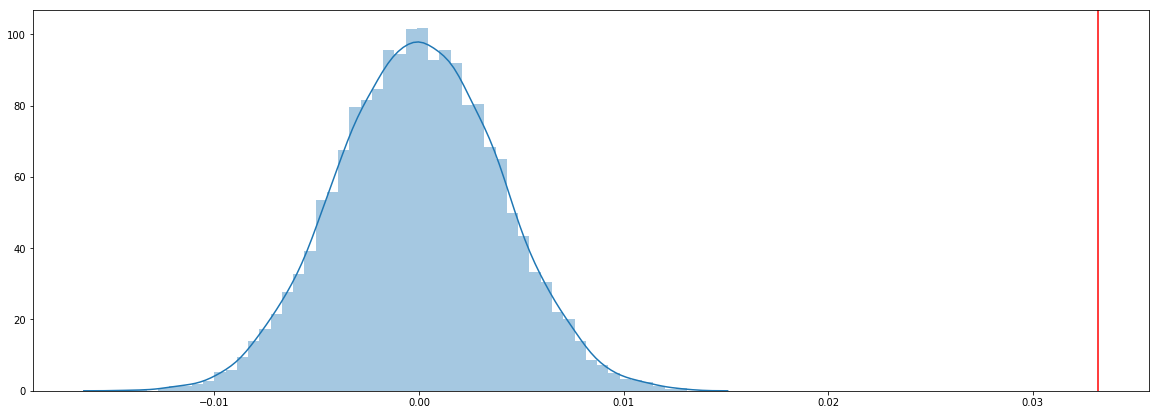

In [135]:
# Distribution of the randomized mean differences
plt.figure(figsize=(20, 7))
sns.distplot(perm_reps3p)
plt.axvline(diff_means3p, color='r')

In [68]:
# Compute p-value: p
p_3pmean = np.sum(perm_reps3p >= diff_means3p) / len(perm_reps3p)
print('The mean 3P% difference between players who are above and below the average salary is', 
      str(diff_means3p))
print('The p-value = ', p_3pmean)

The mean 3P% difference between players who are above and below the average salary is 0.03320393185195347
The p-value =  0.0


For 3P%, regardless of how we split the data, the results are statistically significant. Thus we can reject our null hypothesis, which assumed that there wasn't a correlation between salary and 3P%. It's clear that a players 3-point ability does have an influence on their salary.

### Salary difference of means above/below average USG%

Our data story also suggested that usage percentage is lower among older players. Older players, having been in the league longer, get paid a higher average salary than younger players, implying, curiously, that usage rate should be lower among players who get paid higher salaries.

For our test, our null hypothesis is that there is no difference between USG% and salary. Our alternative hypothesis is that there is a significant difference.

In [69]:
# Salary and USG% columns for all players above the average USG%
abvavusal = dfnbaall.loc[dfnbaall['USG%'] > np.mean(dfnbaall['USG%']),  ['USG%', 'Salary']]
abvavusal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4568 entries, 0 to 9620
Data columns (total 2 columns):
USG%      4568 non-null float64
Salary    4568 non-null int64
dtypes: float64(1), int64(1)
memory usage: 107.1 KB


In [70]:
# Salary and USG% columns for all players below the average USG%
belavusal = dfnbaall.loc[dfnbaall['USG%'] < np.mean(dfnbaall['USG%']),  ['USG%', 'Salary']]
belavusal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5053 entries, 17 to 9618
Data columns (total 2 columns):
USG%      5053 non-null float64
Salary    5053 non-null int64
dtypes: float64(1), int64(1)
memory usage: 118.4 KB


In [71]:
# Salary data for both groups
abvavusalval = abvavusal['Salary']
belavusalval = belavusal['Salary']

In [97]:
abvavusal['Salary'].describe()

count    4.568000e+03
mean     4.517234e+06
std      5.058067e+06
min      5.000000e+03
25%      9.316200e+05
50%      2.466920e+06
75%      6.373900e+06
max      3.096345e+07
Name: Salary, dtype: float64

In [96]:
belavusal['Salary'].describe()

count    5.053000e+03
mean     2.647097e+06
std      3.037411e+06
min      2.531000e+03
25%      7.032000e+05
50%      1.440000e+06
75%      3.600000e+06
max      2.235936e+07
Name: Salary, dtype: float64

In [72]:
# Difference of means between both groups
diff_means_usal = diff_of_means(abvavusalval, belavusalval)
diff_means_usal

1870136.9210778615

In [73]:
# 10000 bootstrap replicates
perm_reps_usal = draw_perm_reps(abvavusalval, belavusalval, diff_of_means, 10000)

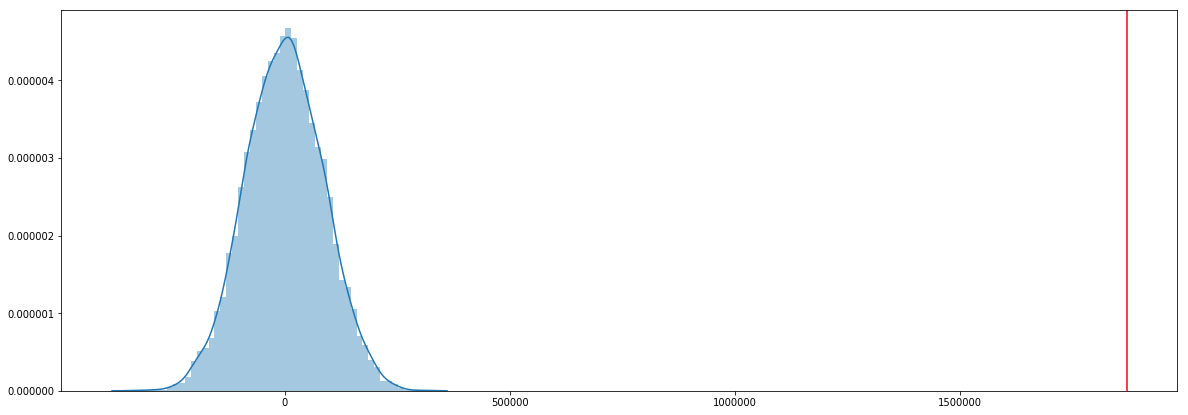

In [136]:
# Distribution of replicates
plt.figure(figsize=(20, 7))
sns.distplot(perm_reps_usal)
plt.axvline(diff_means_usal, color='r')

In [75]:
# Compute p-value: p
p_usal = np.sum(perm_reps_usal >= diff_means_usal) / len(perm_reps_usal)
print('The mean USG% difference between players who are above and below the average salary is', 
      str(diff_means_usal))
print('The p-value = ', p_usal)

The mean USG% difference between players who are above and below the average salary is 1870136.9210778615
The p-value =  0.0


Our p-value is 0.0, allowing us to reject our null hypothesis. Despite our initial graphical analysis, our difference of means indicates that average salary is higher among players who have a higher USG%.  There is a connection between USG% and salary, just not the connection that our original analysis had lead us to believe. It makes sense that players who receive higher salaries have higher usage percentage values. USG% takes into account not only minutes played, but also how involved a player is while they are on the court. More experienced players are involved at a higher percentage, play more minutes, and have larger salaries. Obviously, teams want to get the most out of a player if they are going to be paid higher salaries. But it's also true that strong players benefit their teams more while on the floor.

### ANOVA test of salary versus position

We're also interested in determining whether there is a significant difference in salary based on position. A graphical analysis in the data story had indicated that point guards appeared to be paid the least and had the lowest amount of variation, while centers and power forwards had the largest variation. In order to compare all 5 positions together, we'll be conducting an ANOVA analysis. 

For an ANOVA test, the data has to be normally distributed. We'll check to see if it is by graphing the distribution of each the 5 positions. 

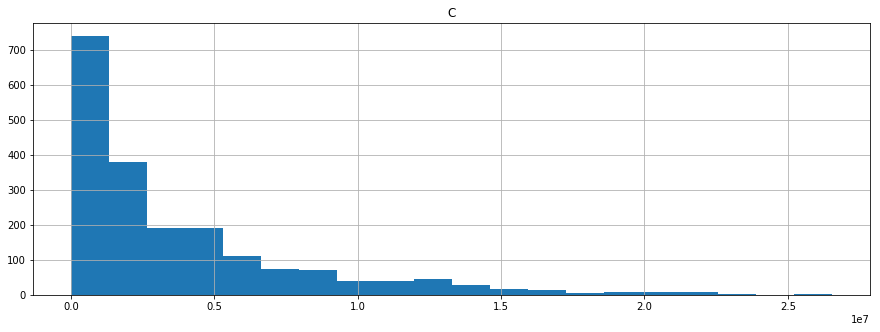

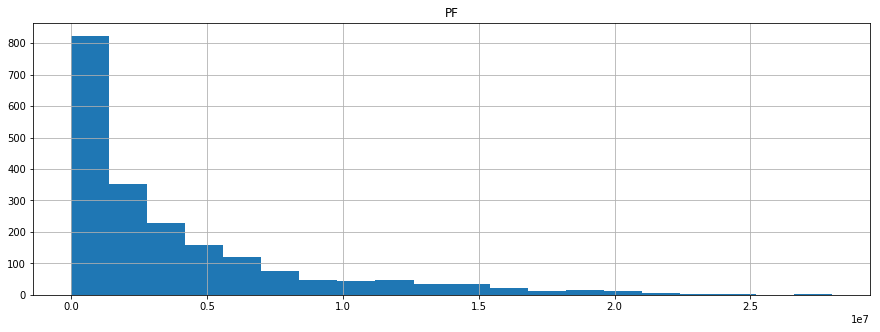

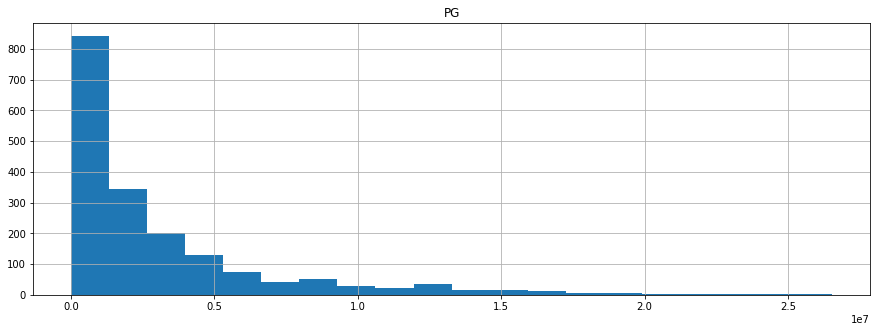

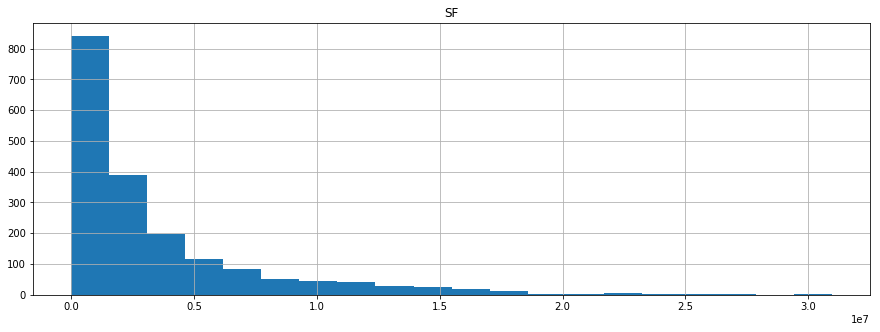

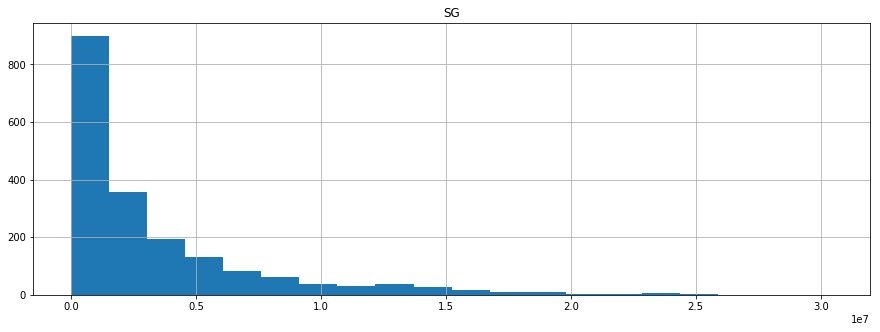

In [113]:
# Create histograms for each group in the dataset
def salary_hist(data, group):
    plt.figure(figsize=(15, 5))
    data.Salary.hist(bins=20)
    plt.title(group)
    plt.show()

# Group by position and plot salary data    
for group, data in dfnbaall.loc[dfnbaall.Pos.isin(['PF', 'C', 'SG', 'SF', 'PG'])].groupby('Pos'):
    salary_hist(data, group)

The histograms show that the data for all 5 positions is heavily right skewed. Let's try log transformations on each in hopes that we might get a more uniform distribution.

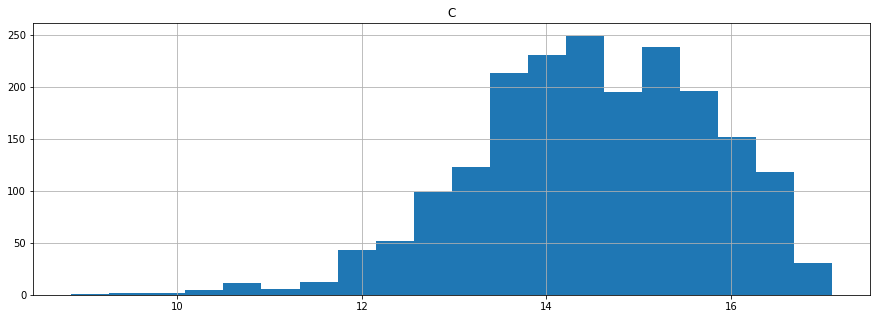

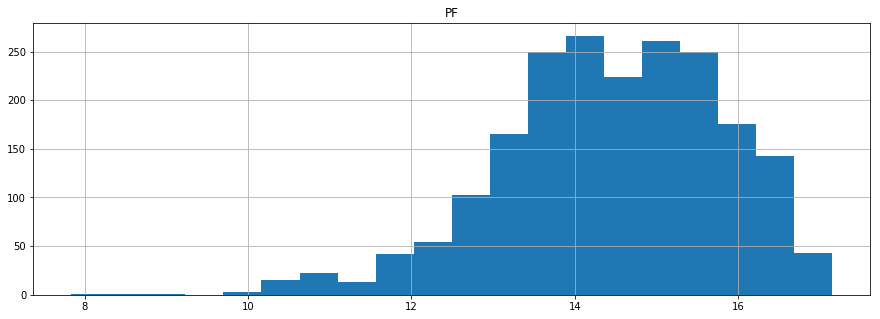

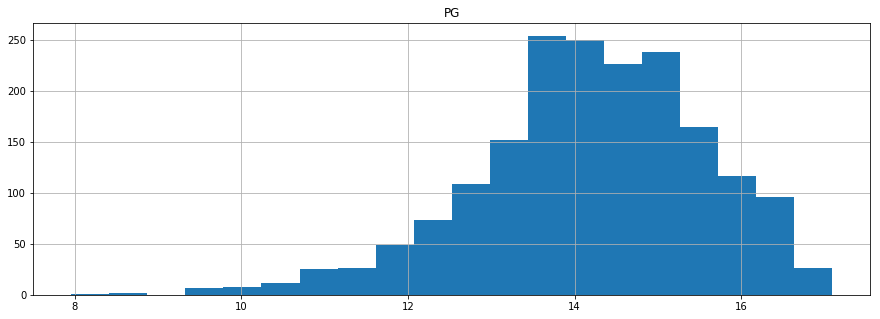

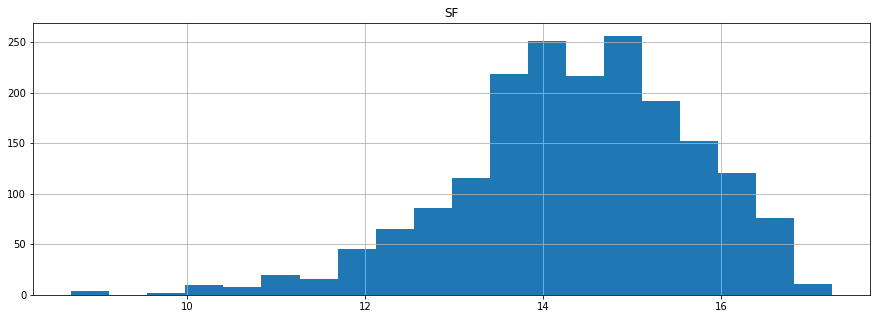

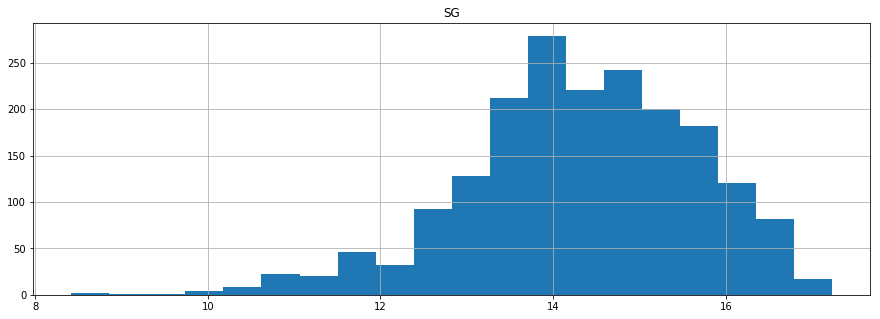

In [114]:
# Create log transformation of salary of each position group 
def log_salary_hist(data, group):
    plt.figure(figsize=(15, 5))
    np.log(data.Salary).hist(bins=20)
    plt.title(group)
    plt.show()

#Group by position and plot
for group, data in dfnbaall.loc[dfnbaall.Pos.isin(['PF', 'C', 'SG', 'SF', 'PG'])].groupby('Pos'):
    log_salary_hist(data, group)

The log transformations show a much more normal disttribution of data for each position. Thus, we can apply an ANOVA analysis to compare the salary difference among the 5 postions.

For this analysis, our null hypothesis will be that there is no difference in salary between all 5 positions. Our alternative hypothesis is that there is as signficant difference in salary between positions. 

In [6]:
# Import the necessary libraries
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
# We'll begin by getting some basic stats about the salary column
rp.summary_cont(dfnbaall['Salary'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Salary,9621.0,3.535028e+06,4.226466e+06,43089.081696,3.450564e+06,3.619491e+06


In [8]:
# Next, we'll get details about each position
rp.summary_cont(dfnbaall['Salary'].groupby(dfnbaall['Pos']))

,N,Mean,SD,SE,95% Conf.,Interval
Pos,,,,,,
C,1979,3.796417e+06,4.288673e+06,96405.112966,3.607416e+06,3.985419e+06
PF,2030,3.869948e+06,4.513690e+06,100180.615818,3.673546e+06,4.066351e+06
PG,1836,3.100985e+06,3.916515e+06,91403.639404,2.921785e+06,3.280185e+06
SF,1864,3.451256e+06,4.121353e+06,95458.990769,3.264106e+06,3.638406e+06
SG,1912,3.407347e+06,4.191853e+06,95865.439075,3.219402e+06,3.595292e+06


Power forwards have the highest mean salary and standard deviation, while point guards have the smallest values in both of those categories.

In [9]:
# Calculation of the F-statistic and p-value
stats.f_oneway(dfnbaall['Salary'][dfnbaall['Pos'] == 'PG'], 
             dfnbaall['Salary'][dfnbaall['Pos'] == 'SG'],
             dfnbaall['Salary'][dfnbaall['Pos'] == 'SF'], 
              dfnbaall['Salary'][dfnbaall['Pos'] == 'PF'], 
              dfnbaall['Salary'][dfnbaall['Pos'] == 'C'])

F_onewayResult(statistic=10.581413749062929, pvalue=1.4896111851091458e-08)

The F-statistic, which measures the difference in population variances, and p-value calculation suggest that positon does seem to have some affect on salary. However, we'll need to do a more detailed analysis to learn more. 

In [10]:
# A regression for the 5 positons
results = ols('Salary ~ C(Pos)', data=dfnbaall).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     10.58
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.49e-08
Time:                        02:01:02   Log-Likelihood:            -1.6042e+05
No. Observations:                9621   AIC:                         3.208e+05
Df Residuals:                    9616   BIC:                         3.209e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.796e+06   9.48e+04     40.039      0.000    3.61e+06    3.98e+06
C(Pos)[T.PF]  7.353e+04   1.33e+05      0.552      0.581   -1.88e+05    3.35e+05
C(Pos)[T.PG] -6.954e+05   1.37e+05     -5.088      0.000   -9.63e+05   -4.28e+05
C(Pos)[T.SF] -3.452e+05   1.36e+05     -2.535      0.011   -6.12e+05   -7.83e+04
C(Pos)[T.SG] -3.891e+05   1.35e+05     -2.876      0.004   -6.54e+05   -1.24e+05
==============================================================================
Omnibus:                     3984.578   Durbin-Watson:                   0.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16009.183
Skew:                           2.076   Prob(JB):                         0.00
Kurtosis:                       7.765   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The F-stat and p-value indicate that there is a significant difference between the mean salaries of each of these five positions. However, it also indicates that there is no signifcant difference between the salaries of centers and power forwards.

In [12]:
# An ANOVA table
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Pos),7.530635e+14,4.0,10.581414,1.489611e-08
Residual,1.710891e+17,9616.0,NaN,NaN


For more information, we've created the above ANOVA table. The sum of squares gives the amount of variance in the data. In this case, there is a great amount of variance. Paired with the extremely low p-value, the ANOVA test indicates that we should reject our null hypothesis. We can conclude that there is a significant difference in salary between positions. It's likely the case that position does influence salary (in addition to other variables, as we've seen). Centers and power forwards are paid more than other positions, while point guards are paid the least, by a wide margin. As we stated in our data story, it's not immediately clear as to why point guards are paid so much less, and our dataset doesn't have the necessary data for us to develop a testable hypothesis. The main takeaway for players is that being a center or power forward is, on average, more lucrative than being a point guard and that one's position does influence one's salary. 

### PER analysis

PER, or player efficiency rating, is a rather curious statistic. It's calculated using a fairly elaborate equation that takes into account at least a dozen other player stats. It's often cited as a valuable stat in determining the 'best' players in the league, partly because it incorporates so many different variables, both offensive and defensive (though it favors offense over defense). However, our data story graphs seemed to indicate that there was very little difference in PER between players of all different salary ranges. In fact, many players with high salaries often had PER values similar to players near the bottom of the salary scale. So, a question arises as to why such a valuable stat seems to have such a low correlation (0.378) with salary. 

In [59]:
# Correlation between salaruy and PER
pearson_r(dfnbaall['Salary'], dfnbaall['PER'])

0.37796980913960454

 We'll start by looking at the distribution of PER data.

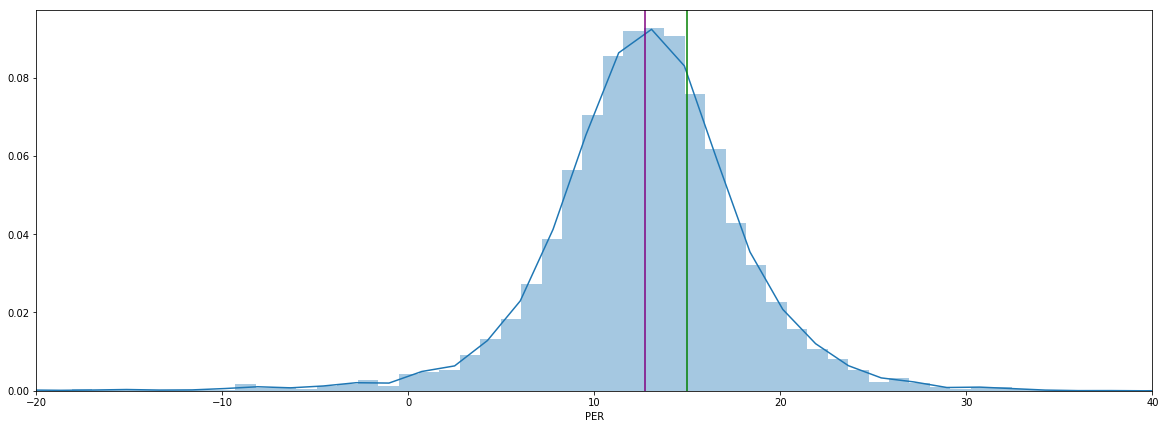

In [142]:
# Distribution of PER, with the league standardized average of 15 in green and the average of our dataset (12.7) in purple
plt.figure(figsize=(20, 7))
sns.distplot(dfnbaall['PER'], bins=200)
plt.xlim(-20, 40)
plt.axvline(np.mean(dfnbaall['PER']), color='purple')
plt.axvline(15, color='green')

In [115]:
dfnbaall['PER'].describe()

count    9621.000000
mean       12.714416
std         5.767865
min       -90.600000
25%         9.900000
50%        12.900000
75%        15.700000
max       129.100000
Name: PER, dtype: float64

It appears that the vast majority of PER values fall just under 15. This may be due to the league average being adjusted to 15 every season as a way to better allow comparisons between seasons. Thus, most players fall under the standardized average. The actual average, across all seasons is 12.7. Let's take a look at the how PER and salary compare graphically.

Populating the interactive namespace from numpy and matplotlib


(-10, 30, None, None)

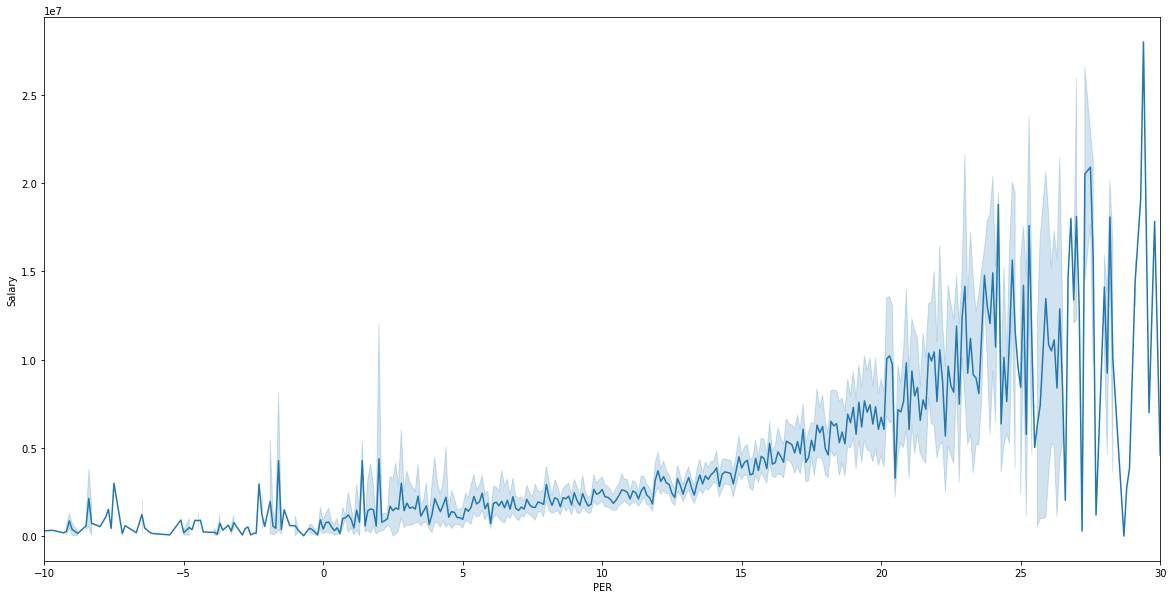

In [27]:
# Graph of PER vs salary, leaving off the more extreme values on each end
%pylab inline
plt.figure(figsize=(20, 10))
sns.lineplot(x='PER', y='Salary', data=dfnbaall)
plt.axis((-10, 30, None, None))

For most PER values salary is fairly stable. There is large increase after 15. Yet, the most noticeable aspect is the drastic increase in variance after 20. It's not clear why there is such a huge variance. It's likely due to a small group of players with high variance having large salaries well above the league average. Players above 20 are considered elite, with the majority of them being all-star and MVP candidates. 

In [58]:
perabv20 = dfnbaall.loc[dfnbaall['PER'] > 20,  ['PER', 'Salary']]
perabv20.sort_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 4512 to 9541
Data columns (total 2 columns):
PER       614 non-null float64
Salary    614 non-null int64
dtypes: float64(1), int64(1)
memory usage: 14.4 KB


In the entire data set, from 1991 to 2017, there are only 614 cases of a PER higher than 20, so it's quite rare. Below, by graphing all PER values above 20, we see how drastic the variance in the data is. While the correlation between salary and PER is quite low, because there are many extreme salaries associated with strong PER performance, the weight of those salaries may be enough to lead to the conclusion that the salary difference between players above and below the average PER is statistically significant, despite the fact that a majority of all players' PER values fall in a very narrow range.

(20, 35, None, None)

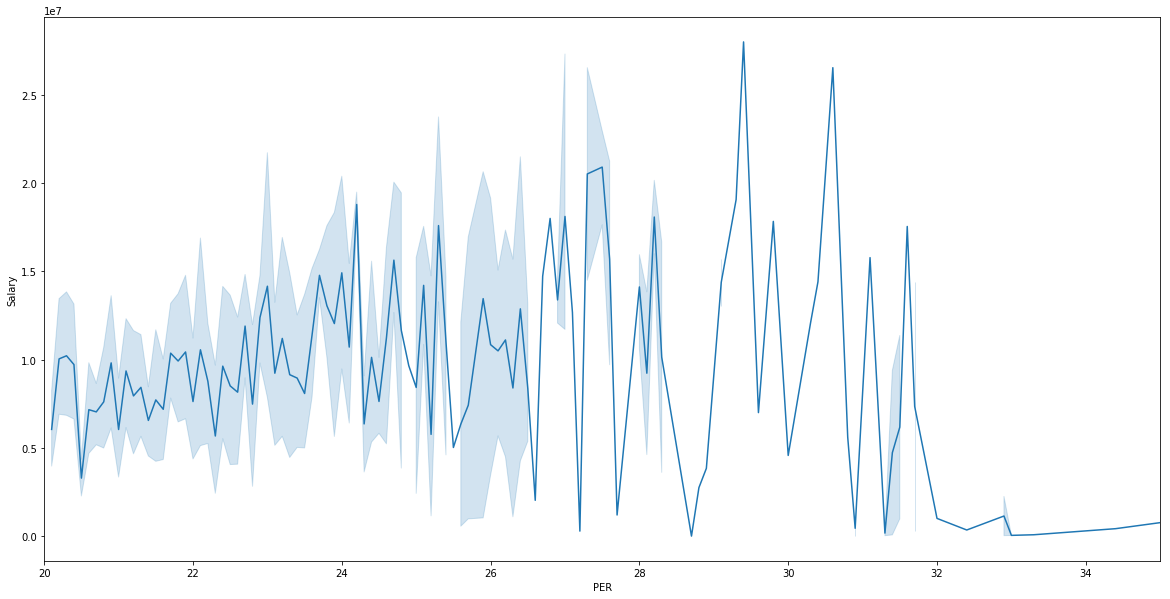

In [55]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='PER', y='Salary', data=perabv20)
plt.axis((20, 35, None, None))

We'll run a bootstrap analysis to see if there is a difference in salary between players who are above the designated average of 15 and those below. For our null hypothesis, we'll assume that there is no correlation between PER and salary. Our alternate hypothesis will be that there is a correlation.

In [78]:
# Salary and PER data for all players above 15 PER. Though the actual average is below 15, we'll use 15 as our dividing 
# line since it is the designated average.
abvavpers = dfnbaall.loc[dfnbaall['PER'] > 15,  ['PER', 'Salary']]
abvavpers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 7 to 9617
Data columns (total 2 columns):
PER       2880 non-null float64
Salary    2880 non-null int64
dtypes: float64(1), int64(1)
memory usage: 67.5 KB


In [79]:
# Salary and PER data for all players below 15 PER
belavpers = dfnbaall.loc[dfnbaall['PER'] < 15,  ['PER', 'Salary']]
belavpers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6653 entries, 0 to 9620
Data columns (total 2 columns):
PER       6653 non-null float64
Salary    6653 non-null int64
dtypes: float64(1), int64(1)
memory usage: 155.9 KB


In [80]:
#Salary data for both groups
abvavpersal = abvavpers['Salary']
belavpersal = belavpers['Salary']

In [99]:
abvavpers['Salary'].describe()

count    2.880000e+03
mean     5.955599e+06
std      5.520439e+06
min      5.000000e+03
25%      1.599300e+06
50%      4.000000e+06
75%      9.060938e+06
max      3.096345e+07
Name: Salary, dtype: float64

In [98]:
belavpers['Salary'].describe()

count    6.653000e+03
mean     2.482815e+06
std      2.975560e+06
min      2.531000e+03
25%      6.386790e+05
50%      1.328000e+06
75%      3.250000e+06
max      3.045380e+07
Name: Salary, dtype: float64

In [81]:
# Salary difference of means
diff_means_pers = diff_of_means(abvavpersal, belavpersal)
diff_means_pers

3472784.8927050973

In [82]:
# 10000 repetitions of difference of means
perm_reps_pers = draw_perm_reps(abvavpersal, belavpersal, diff_of_means, 10000)

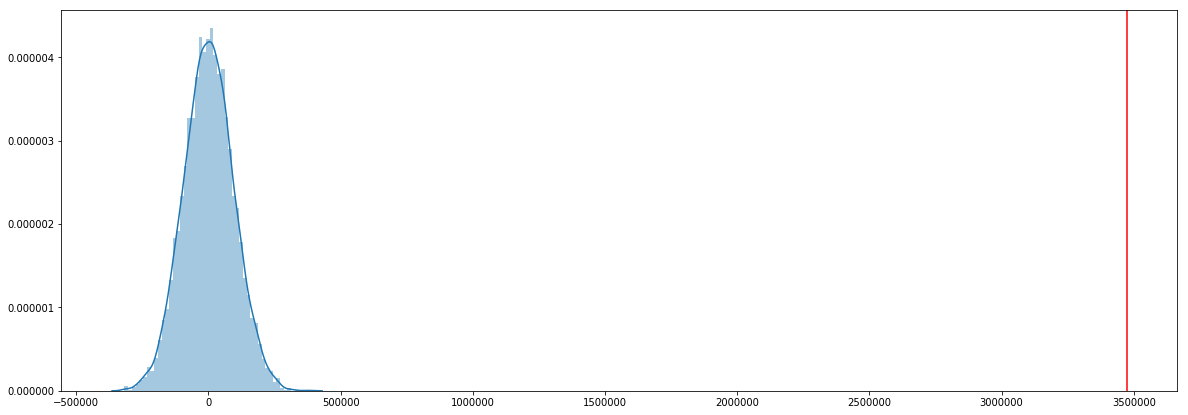

In [137]:
# Distribution of the 10000 replicates
plt.figure(figsize=(20, 7))
sns.distplot(perm_reps_pers)
plt.axvline(diff_means_pers, color='r')

In [84]:
# Compute p-value: p
p_pers = np.sum(perm_reps_pers >= diff_means_pers) / len(perm_reps_pers)
print('The mean salary difference between players who are above and below the average PER is', 
      str(diff_means_pers))
print('The p-value = ', p_pers)

The mean salary difference between players who are above and below the average PER is 3472784.8927050973
The p-value =  0.0


Our test returns a p-value of 0.0. Our p-value is statistically significant, thus we have to reject the null hypothesis and conclude that there is a correlation between PER and salary. In fact, it's very rare that a player below average PER will be paid a high salary. However, there are still several cases in which a strong PER performer will receive a salary comparable to players well below the average PER. The main takeaway for players is that they should strive to have high PER values. But given the range of variables that go into such a calculation, a player needs to be fairly well rounded and do well in a number of offensive and defensive categories. It's not to say that players can't be one dimensional and still make high salaries, but being multidimensional can significantly increase one's chances of becoming well compensated financially.

### PER difference of means above/below average age

So, from a player’s perspective, it’s worth having a high PER rating. What about PER from a team’s perspective? In our data story, we noticed that for several statistics, player performances rose steadily and peaked in their late 20s and early 30s, before declining. The same trend was apparent with PER, though neither the rise or decline was as sharp as with other variables. That may partly be due to PER being averaged to 15 every year. It’s worth testing whether PER is significantly different between players above and below the average age. 
We know that older players get paid more than younger players for a variety of factors, including player union agreements. But is it worth for a team to invest more money in older players if they could get similar PER ratings from younger players? There’s no statistic that encompasses every aspect of NBA play or can give a complete picture of team success. But PER, because of its multi-stat approach, maybe the best indicator in our dataset of how valuable a player may be for overall team success. As such, we can use the results of our test to make some sort of recommendation regarding PER.  

In [109]:
# NBA player age description
dfnbaall['Age'].describe()

count    9621.000000
mean       26.264214
std         3.932993
min        18.000000
25%        23.000000
50%        26.000000
75%        29.000000
max        40.000000
Name: Age, dtype: float64

For our null hypothesis, we'll assume that there is no diffrence in means PER for players above and below the average age. Our alternative hypothesis is that there is a difference.

In [116]:
# PER and age data for players above the average age
abvavpera = dfnbaall.loc[dfnbaall['Age'] > np.mean(dfnbaall['Age']),  ['PER', 'Age']]
abvavpera.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4033 entries, 11 to 9617
Data columns (total 2 columns):
PER    4033 non-null float64
Age    4033 non-null float64
dtypes: float64(2)
memory usage: 94.5 KB


In [117]:
# PER and age data for players below the average age
belavpera = dfnbaall.loc[dfnbaall['PER'] < np.mean(dfnbaall['Age']),  ['PER', 'Age']]
belavpera.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9536 entries, 0 to 9620
Data columns (total 2 columns):
PER    9536 non-null float64
Age    9536 non-null float64
dtypes: float64(2)
memory usage: 223.5 KB


In [118]:
# PER data for both groups
abvavperap = abvavpera['PER']
belavperap = belavpera['PER']

In [119]:
abvavperap.describe()

count    4033.000000
mean       12.707364
std         5.339577
min       -90.600000
25%         9.900000
50%        12.800000
75%        15.700000
max        45.300000
Name: PER, dtype: float64

In [120]:
belavperap.describe()

count    9536.000000
mean       12.541338
std         5.337684
min       -90.600000
25%         9.900000
50%        12.800000
75%        15.600000
max        26.200000
Name: PER, dtype: float64

In [121]:
# Salary difference of means
diff_means_perap = diff_of_means(abvavperap, belavperap)
diff_means_perap

0.16602615773061657

In [129]:
# 10000 repetitions of difference of means
perm_reps_perap = draw_perm_reps(abvavperap, belavperap, diff_of_means, 10000)

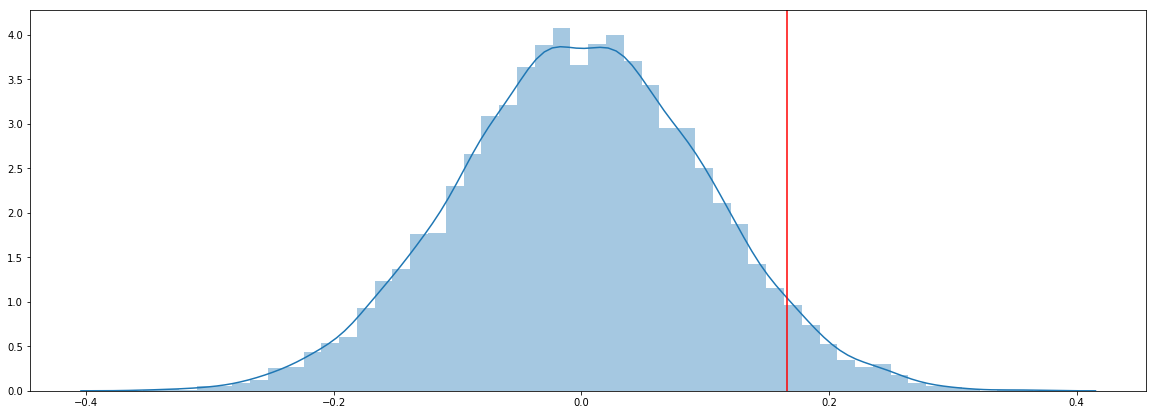

In [138]:
# Distribution of the 10000 replicates
plt.figure(figsize=(20, 7))
sns.distplot(perm_reps_perap)
plt.axvline(diff_means_perap, color='r')

In [131]:
# Compute p-value: p
p_perap = np.sum(perm_reps_perap >= diff_means_perap) / len(perm_reps_perap)
print('The mean PER difference between players who are above and below the average age is', 
      str(diff_means_perap))
print('The p-value = ', p_perap)

The mean salary difference between players who are above and below the average PER is 0.16602615773061657
The p-value =  0.0489


Our resulting p-value is 0.0489. It is technically significant given our alpha value of 0.05. However, it’s not overwhelmingly convincing. As such, while we can reject our null hypothesis, we do need to consider the practical implications of doing so. Since there is not a great degree of difference in PER values between older and younger players, but there is a large difference in salary, it may be more cost effective for a team to have more younger rather than older players on their roster. There are, of course, many other factors to consider, including the performance history of each player. But from a statistical perspective, younger players can offer similar PER performance to older players at a much lower cost. Luckily, for older players, this isn’t the only factor that teams consider when putting together a roster. In addition to a variety of other statistics, there are many other factors, such as experience, temperament, the ability to perform under pressure, and the ability to get along with teammates, that aren't as easily quantifiable and that maybe in greater abundance in older players.   

Finally, there is a concerning question from these two PER analyses - salary/PER and PER/age - why is there such a large difference in salary above and below average PER, but such a small difference in PER above and below average age, especially given that older players are paid much higher salaries than younger players? There are a couple of possible explanations:
One, younger players with PER values slightly above the average may be getting paid higher for potential rather than actual performance adding to the effect that higher PER and higher salaries are connected, but not adding much to the connection between older players and higher PER values. The other possibility may be that older players with high PER and extremely high salaries,  as we saw in an earlier graph, are skewing the salary/PER results to a greater extent than the PER/age results. The difference in their salary in relation to the rest of the league is far greater than the difference in their PER in relation to the rest of the league. As a result, we see a much lower p-value for the salary/PER analysis than we do for the PER/age analysis.  